In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_age_price.csv')

In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
y = data['Year']
X = data.drop(['Year'],axis =1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(X_train,y_train)
predictions = model1.predict(X_test)

In [10]:
y_test

40     2019
65     2017
4      2018
47     2018
42     2018
69     2015
26     2017
11     2018
10     2019
44     2019
73     2013
55     2017
68     2015
97     2020
0      2018
18     2019
53     2013
80     2015
103    2017
91     2017
36     2017
12     2017
31     2017
Name: Year, dtype: int64

In [11]:
predictions

array([2017.10269352, 2016.7000756 , 2016.29745767, 2016.09614871,
       2017.43820846, 2014.08305909, 2017.43820846, 2016.76717858,
       2016.76717858, 2017.43820846, 2014.35147104, 2017.43820846,
       2016.29745767, 2018.64606223, 2016.29745767, 2016.76717858,
       2014.68698597, 2015.29091286, 2015.0896039 , 2017.03559053,
       2017.43820846, 2016.76717858, 2017.43820846])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  1.780211042743283
The r squared value is:  0.445387725788459


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
lin_reg = LinearRegression()
model2 = lin_reg.fit(X_train,y_train)
predictions = model2.predict(X_test)
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  1.780211042743283
The r squared value is:  0.445387725788459


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_reg = LinearRegression()
model3 = lin_reg.fit(X_train,y_train)
predictions = model3.predict(X_test)
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  0.36655838771575056
The r squared value is:  0.7760861580812562


In [19]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 0.36655356349258444
  Columns  Coefficient Estimate
0   Price              0.000014


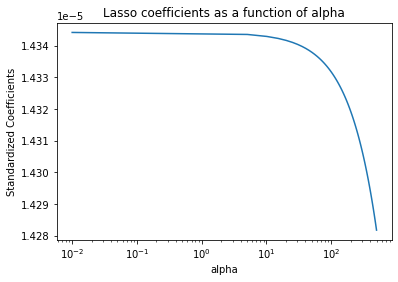

In [20]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [21]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [22]:
model.alpha_

1071.0060021935342

In [23]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=1071.0060021935342)

In [24]:
print(list(zip(lasso_best.coef_, X)))

[(1.4210458005166658e-05, 'Price')]


In [27]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 57.37
R squared test set 77.91


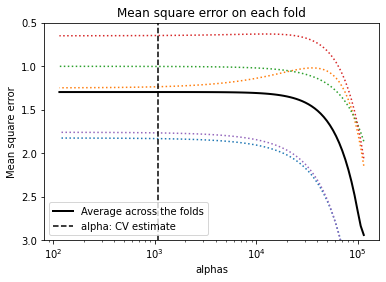

In [39]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 3, .5
plt.ylim(ymin, ymax);